## Import Data

In [243]:
import pandas as pd
import matplotlib.pyplot as plt


wine_names = ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'Alc.Ash', 'Magnesium', 'TotalPhenols', \
              'Flavanoids', 'Nonflav.Phenols', 'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315',\
              'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names) 
wine_df = pd.DataFrame(wine_data)
wine_df.Class = wine_df.Class - 1


## Train Data

In [279]:
from sklearn.model_selection import train_test_split
Y = wine_df.loc[:,'Class'].values
X = wine_df.loc[:,'Alcohol':'Proline'].values

#we split the dataset into a test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=0)

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(train_x, train_y)

In [280]:
train_score = clf.score(train_x, train_y)
train_score

0.9516129032258065

## Plot graph of decision tree

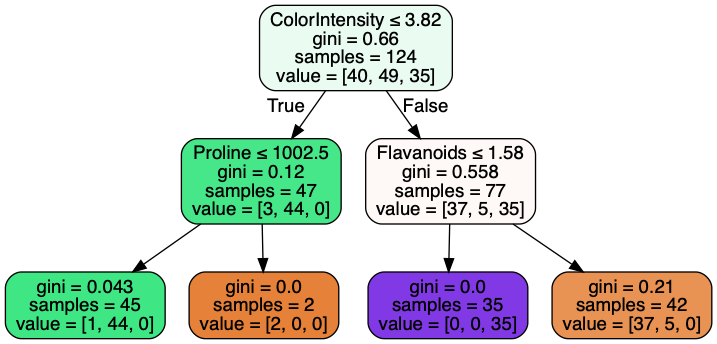

In [281]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, 
                feature_names=wine_names[1:14],
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Test data

In [282]:
test_score = clf.score(test_x, test_y)
test_score

0.8703703703703703

## Random Forest

In [283]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2, max_features = 'sqrt',verbose = 1, bootstrap = False)
RF_clf.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=2, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [284]:
test_score = RF_clf.score(test_x, test_y)
test_score

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


0.9629629629629629

## xgboost

In [289]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtest = xgb.DMatrix(test_x, test_y, feature_names=wine_names[1:14])
dtrain = xgb.DMatrix(train_x, train_y,feature_names=wine_names[1:14])

param = {'max_depth': 2, 
         'learning_rate': 0.3, 
         'verbosity': 1, 
         'objective': 'multi:softmax', 
         'num_class': 3, 
         'eval_metric': 'merror'}

evallist = [(dtrain, 'train')]

In [290]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-merror:0.016129
[1]	train-merror:0.016129
[2]	train-merror:0.016129
[3]	train-merror:0.016129
[4]	train-merror:0.008065
[5]	train-merror:0.008065
[6]	train-merror:0.008065
[7]	train-merror:0
[8]	train-merror:0
[9]	train-merror:0


In [291]:
ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
accuracy_score(test_y,ypred)

0.9629629629629629

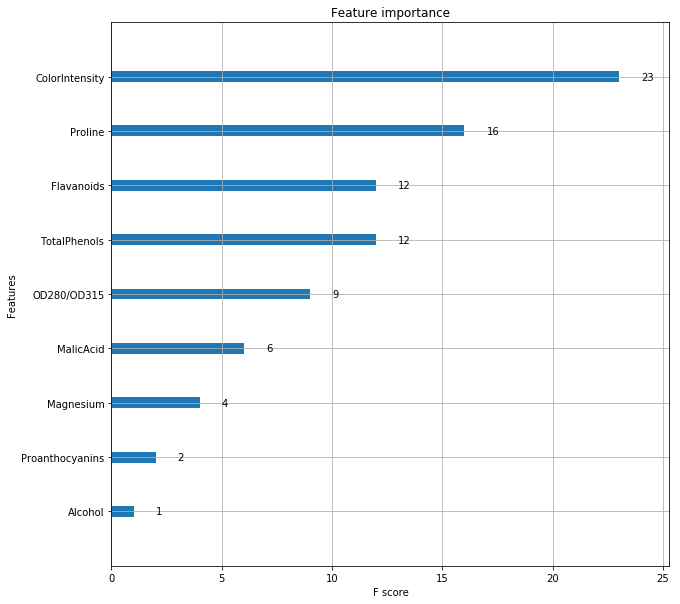

In [288]:
fig, ax = plt.subplots(figsize=(10, 10))
xgb.plot_importance(bst,ax=ax)
plt.show()

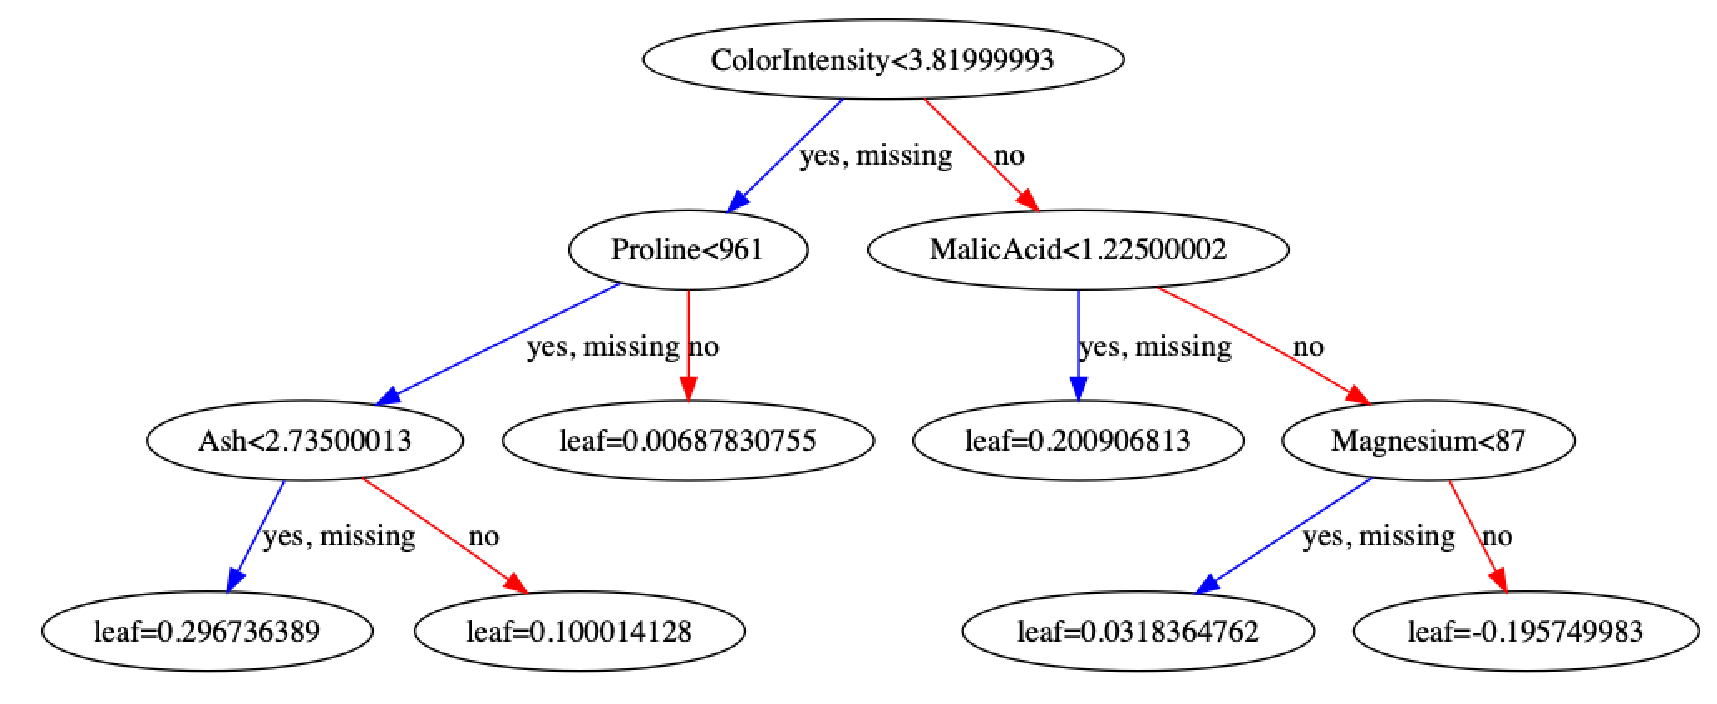

In [278]:
fig, ax = plt.subplots(figsize=(30, 30))
xgb.plot_tree(bst, num_trees=4, ax=ax)
plt.show()